In [ ]:
from google.colab import files
files.upload()

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset
!unzip vegetable-image-dataset.zip

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

# Visualise the Images

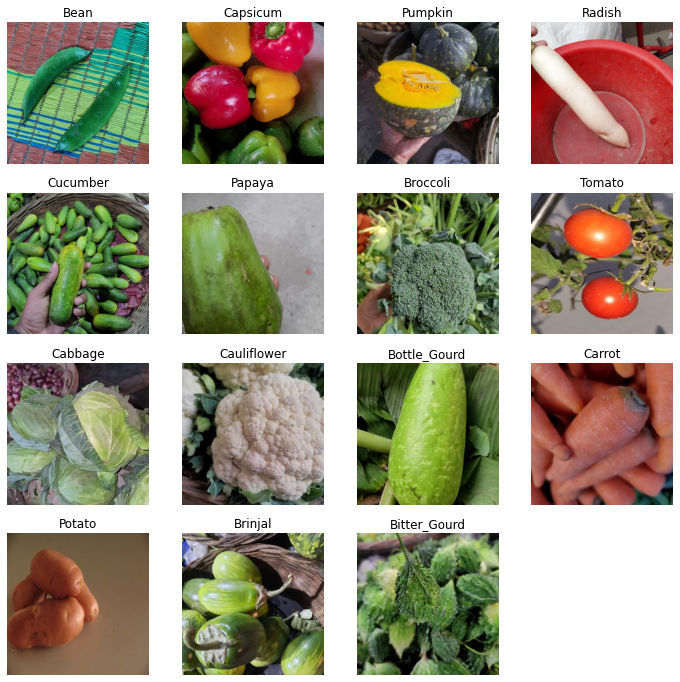

In [5]:
# Let's plot a few images
train_path = "Vegetable Images/train"
validation_path = "Vegetable Images/validation"
test_path = "Vegetable Images/test"

image_categories = os.listdir('Vegetable Images/train')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)
        

# Prepare the Dataset

In [6]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalize the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalize the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalize the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [7]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


# Building a CNN model

In [8]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [9]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/100
468/468 [==============================] - 49s 78ms/step - loss: 1.3230 - accuracy: 0.5579 - val_loss: 0.5829 - val_accuracy: 0.8135
Epoch 2/100
468/468 [==============================] - 37s 79ms/step - loss: 0.4873 - accuracy: 0.8441 - val_loss: 0.3049 - val_accuracy: 0.9116
Epoch 3/100
468/468 [==============================] - 37s 78ms/step - loss: 0.2875 - accuracy: 0.9097 - val_loss: 0.2747 - val_accuracy: 0.9207
Epoch 4/100
468/468 [==============================] - 36s 78ms/step - loss: 0.1911 - accuracy: 0.9378 - val_loss: 0.2525 - val_accuracy: 0.9304
Epoch 5/100
468/468 [==============================] - 36s 77ms/step - loss: 0.1486 - accuracy: 0.9514 - val_loss: 0.2067 - val_accuracy: 0.9479
Epoch 6/100
468/468 [==============================] - 36s 77ms/step - loss: 0.1118 - accuracy: 0.9647 - val_loss: 0.2210 - val_accuracy: 0.9392
Epoch 7/100
468/468 [==============================] - 36s 77ms/step - loss: 0.0970 - accuracy: 0.9671 - val_loss: 0.2731 - val_ac

**Model trained for 15 Epochs**

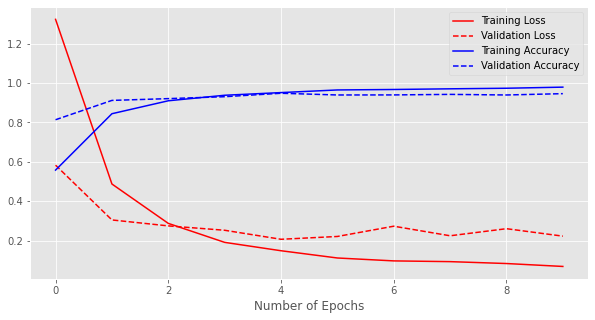

In [10]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [11]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

94/94 [==============================] - 5s 54ms/step - loss: 0.2402 - accuracy: 0.9450


[0.2401546984910965, 0.9449999928474426]

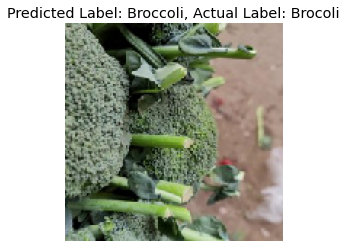

In [13]:
# Testing the Model
test_image_path = 'Vegetable Images/test/Broccoli/1011.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Brocoli')

In [14]:
# Let's test the model on an image from an external source
!wget "https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg"

--2022-04-27 08:24:42--  https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/i020rz847u8bq09/beans.jpg [following]
--2022-04-27 08:24:42--  https://www.dropbox.com/s/raw/i020rz847u8bq09/beans.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc25c43aacbdbfde5e2ba224b927.dl.dropboxusercontent.com/cd/0/inline/BkK0AXOO58H1B_G82aYXdai_AYdC_KEkthBWXI9eEWvd1vDkPKUTPWrWlqBJZm5ifsC9Yo5-XdQDe2Az_CL6dgXcut4GtMK89xJaGMoxKOWRnrzJPfgbQ89YoAEEC0Uqi-cmu6Wv7joFJR3d79aqaiC1f26MEFNoWrYW2KzkjJKgYg/file# [following]
--2022-04-27 08:24:43--  https://uc25c43aacbdbfde5e2ba224b927.dl.dropboxusercontent.com/cd/0/inline/BkK0AXOO58H1B_G82aYXdai_AYdC_KEkthBWXI9eEWvd1vDkPKUTPWrWlqBJZm5ifsC9Yo5-XdQDe

In [15]:
!wget "https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg"

--2022-04-27 08:24:48--  https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lge1plvr4mg5w7y/potato_2.jpg [following]
--2022-04-27 08:24:49--  https://www.dropbox.com/s/raw/lge1plvr4mg5w7y/potato_2.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4a849e81506775c5b4265367a6.dl.dropboxusercontent.com/cd/0/inline/BkLeNL-tBvz3p0ltnSzA-R-3fNM86QBnsQvXrJc4N6aciaoo0ufO4Cgd4DXkEh_-XOWPtK49BEN-X9nkdWAQGVKOdt-125dO4HpUl7vksniKctXSEx-LstSpOGc6i_t8fzNHpB_HoLpW3KSDeTaM6Ljr5QFYvXBLqb2dDiJ4Da4kow/file# [following]
--2022-04-27 08:24:49--  https://uc4a849e81506775c5b4265367a6.dl.dropboxusercontent.com/cd/0/inline/BkLeNL-tBvz3p0ltnSzA-R-3fNM86QBnsQvXrJc4N6aciaoo0ufO4Cgd4DXkEh_-XOWP

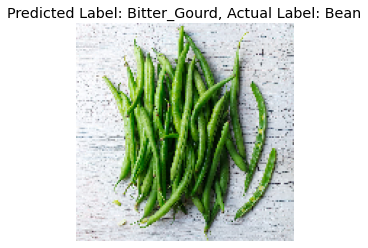

In [16]:
# Generate predictions for external images
external_image_path_1 = "./beans.jpg"
generate_predictions(external_image_path_1, actual_label='Bean')

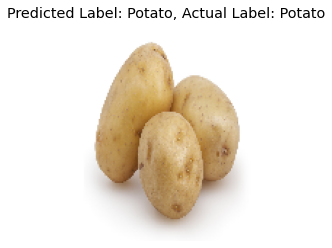

In [17]:
# Generate predictions for external image
external_image_path_2 = "./potato_2.jpg"
generate_predictions(external_image_path_2, actual_label='Potato')

In [18]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [19]:
model = keras.models.load_model('model')

In [20]:
!wget "https://cdn.pixabay.com/photo/2013/12/19/12/20/tomato-230830_1280.jpg"

--2022-04-27 08:30:51--  https://cdn.pixabay.com/photo/2013/12/19/12/20/tomato-230830_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98246 (96K) [image/jpeg]
Saving to: ‘tomato-230830_1280.jpg’

tomato-230830_1280. 100%[===================>]  95.94K  --.-KB/s    in 0.004s  

2022-04-27 08:30:51 (25.4 MB/s) - ‘tomato-230830_1280.jpg’ saved [98246/98246]



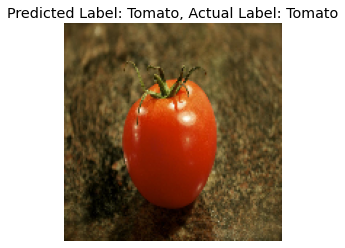

In [21]:
# Generate predictions for external image
external_image_path_2 = "./tomato-230830_1280.jpg"
generate_predictions(external_image_path_2, actual_label='Tomato')

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
model.save('/content/drive/My Drive/model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/model/assets
